In [27]:
import tensorflow as tf


In [28]:
from tensorflow.keras import datasets,layers, models


In [29]:
import numpy as np


In [30]:
import matplotlib.pyplot as plt


In [31]:
from sklearn.metrics import confusion_matrix, classification_report


In [32]:
import seaborn as sns


In [33]:
# Set random seed for reproducibility
tf.random.set_seed(42)

In [34]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

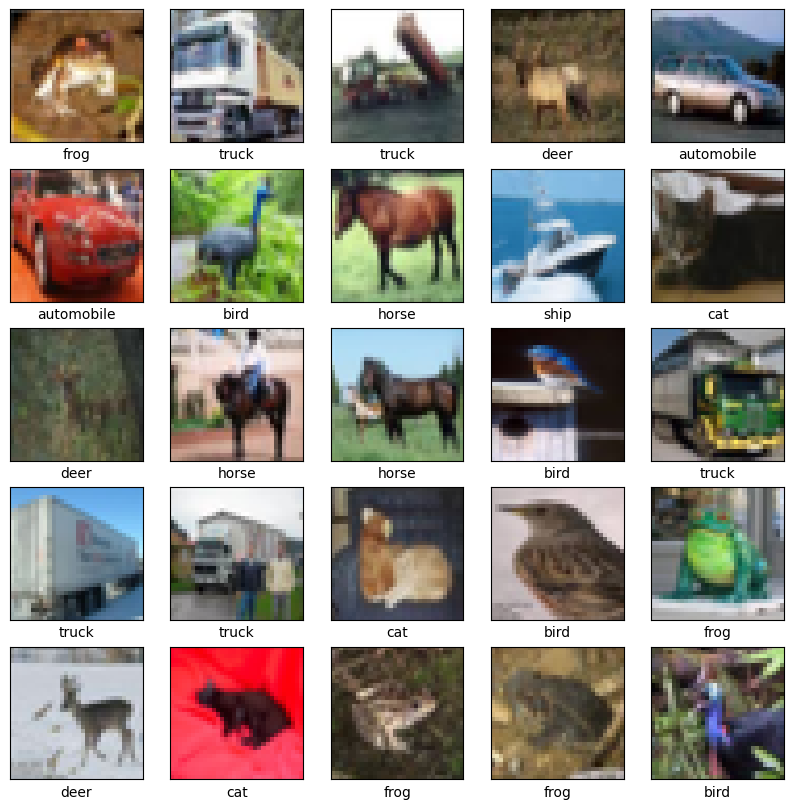

In [35]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [36]:
# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [37]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64,
                    validation_split=0.2, verbose=1)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 262s 419ms/step - accuracy: 0.4974 - loss: 1.4688 - val_accuracy: 0.5453 - val_loss: 1.2798
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 271s 433ms/step - accuracy: 0.6197 - loss: 1.0759 - val_accuracy: 0.6743 - val_loss: 0.9322
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 310s 415ms/step - accuracy: 0.6736 - loss: 0.9260 - val_accuracy: 0.6530 - val_loss: 1.0335
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 261s 413ms/step - accuracy: 0.7124 - loss: 0.8175 - val_accuracy: 0.6900 - val_loss: 0.9000
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 269s 430ms/step - accuracy: 0.7381 - loss: 0.7395 - val_accuracy: 0.7264 - val_loss: 0.7841


In [43]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.2f}")
print(f"Test Loss: {test_loss:.2f}")


Test Accuracy: 0.72
Test Loss: 0.81


In [44]:
# Generate predictions for confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step


In [45]:
# Generate classification report
class_report = classification_report(y_test, y_pred_classes, target_names=class_names)

In [46]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

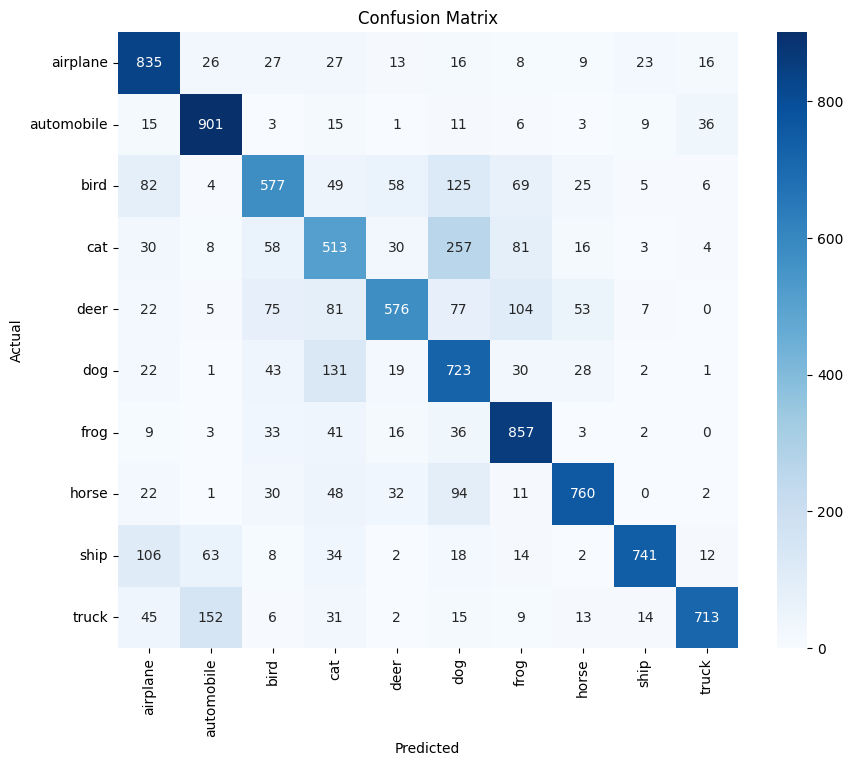

In [47]:
# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [48]:
# Plot training history (accuracy and loss)
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

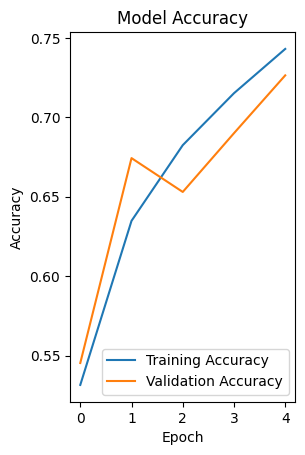

In [49]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

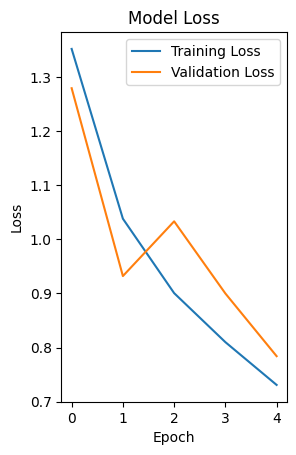

In [50]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [51]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [52]:
# Print classification report
print("\nClassification Report:")
print(class_report)



Classification Report:
              precision    recall  f1-score   support

    airplane       0.70      0.83      0.76      1000
  automobile       0.77      0.90      0.83      1000
        bird       0.67      0.58      0.62      1000
         cat       0.53      0.51      0.52      1000
        deer       0.77      0.58      0.66      1000
         dog       0.53      0.72      0.61      1000
        frog       0.72      0.86      0.78      1000
       horse       0.83      0.76      0.79      1000
        ship       0.92      0.74      0.82      1000
       truck       0.90      0.71      0.80      1000

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.72     10000
weighted avg       0.73      0.72      0.72     10000



In [53]:
# Save metrics to a text file
with open('model_metrics.txt', 'w') as f:
    f.write(f"Test Accuracy: {test_accuracy:.2f}\n")
    f.write(f"Test Loss: {test_loss:.2f}\n\n")
    f.write("Classification Report:\n")
    f.write(class_report)

In [54]:
# Example: Predict on a single test image
sample_idx = 0
sample_image = x_test[sample_idx:sample_idx+1]
sample_label = y_test[sample_idx][0]
pred_label = np.argmax(model.predict(sample_image), axis=1)[0]
print(f"\nExample Prediction: True Label = {class_names[sample_label]}, "
      f"Predicted Label = {class_names[pred_label]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step

Example Prediction: True Label = cat, Predicted Label = cat
